# Deep Dream


O Deep Dream é uma técnica de processamento de imagens que funciona de forma iterativa para realçar padrões e características em uma imagem de entrada usando uma rede neural pré-treinada. Vou explicar o funcionamento passo a passo:

1. **Escolha de uma Rede Neural Pré-treinada**: Comece com uma rede neural profunda pré-treinada em tarefas de reconhecimento de imagens, como classificação de objetos ou detecção de características. Um exemplo comum é o uso do modelo InceptionV3.

2. **Seleção de Camadas Intermediárias**: Dentro dessa rede neural, selecione uma ou mais camadas intermediárias. Essas camadas representam níveis diferentes de abstração na hierarquia da rede. As camadas iniciais capturam detalhes mais simples, como bordas e texturas, enquanto as camadas mais profundas capturam características mais complexas e abstratas, como formas e objetos inteiros.

3. **Otimização da Imagem de Entrada**: A ideia principal do Deep Dream é otimizar uma imagem de entrada para maximizar a ativação de neurônios específicos nessas camadas intermediárias selecionadas. Isso é feito ajustando os pixels da imagem de entrada para que eles ativem esses neurônios com intensidade máxima.

4. **Iteração e Ajuste**: O processo de otimização é iterativo. A imagem de entrada é inicializada com a imagem original que você deseja realçar. Em cada iteração, os gradientes da imagem em relação à ativação das camadas escolhidas são calculados. Esses gradientes indicam como os pixels da imagem devem ser ajustados para aumentar a ativação dos neurônios desejados. A imagem é então ajustada de acordo com esses gradientes.

5. **Regularização e Controle de Intensidade**: Para controlar a intensidade do efeito Deep Dream e evitar que a imagem se torne muito caótica, é comum aplicar regularização. Isso pode envolver a limitação dos valores dos pixels para evitar explosões de intensidade. Além disso, os gradientes podem ser normalizados para manter um comportamento mais controlado durante a otimização.

6. Pós-processamento: Após um número específico de iterações, você pode aplicar pós-processamento para melhorar a qualidade visual da imagem resultante. Isso pode incluir ajustes de contraste, saturação de cores e outros filtros para tornar a imagem mais atraente.

7. **Resultados**: O resultado final é uma imagem que parece ter sido "sonhada" pela rede neural, com padrões e características exagerados e interconectados de maneira psicodélica. Os padrões que emergem na imagem dependem das camadas escolhidas e das características específicas detectadas pela rede.

Em resumo, o Deep Dream funciona otimizando uma imagem de entrada para ativar neurônios específicos em camadas intermediárias de uma rede neural pré-treinada, criando assim imagens com características exageradas e padrões psicodélicos. Essa técnica é usada tanto para explorar representações internas de redes neurais quanto para criar arte visualmente cativante e única.

In [ ]:
!wget https://geographical.co.uk/wp-content/uploads/panda1200-1.jpg

--2023-09-14 20:13:20--  https://geographical.co.uk/wp-content/uploads/panda1200-1.jpg
Resolving geographical.co.uk (geographical.co.uk)... 172.67.71.185, 104.26.6.39, 104.26.7.39, ...
Connecting to geographical.co.uk (geographical.co.uk)|172.67.71.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96057 (94K) [image/jpeg]
Saving to: ‘panda1200-1.jpg’

panda1200-1.jpg     100%[===================>]  93.81K  --.-KB/s    in 0.01s   

2023-09-14 20:13:20 (7.48 MB/s) - ‘panda1200-1.jpg’ saved [96057/96057]



# Importação de Bibliotecas

In [ ]:
!pip install watermark tensorflow==2.13.0 matplotlib==3.7.1 numpy==1.23.5 opencv-python==4.8.0 watermark sklearn==1.2.2

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import warnings


# Função load_inceptionv3_model()

Esta função carrega o modelo InceptionV3 pré-treinado da biblioteca Keras com os pesos treinados na tarefa de classificação de ImageNet.

In [ ]:
# Função para carregar o modelo InceptionV3 pré-treinado
def load_inceptionv3_model():
    model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    return model


# Função compute_loss()

A função compute_loss calcula a perda de ativação em uma camada específica do modelo. Ela cria um modelo intermediário que extrai as ativações da camada especificada.


**image**: É a imagem de entrada para a qual queremos calcular a perda.

**model**: É o modelo neural (no caso, o modelo InceptionV3) que foi carregado e treinado previamente para tarefas de classificação de imagens.

**layer_name**: É o nome da camada específica do modelo para a qual queremos calcular a perda. No código fornecido, essa camada é chamada de 'mixed3'.

**Por que a função compute_loss é usada no Deep Dream:**

O Deep Dream é um processo iterativo de otimização que visa criar imagens artisticamente estilizadas ou psicodélicas. A ideia é maximizar a ativação de uma camada específica de um modelo neural pré-treinado. A função compute_loss desempenha um papel fundamental ao calcular o quanto uma imagem está ativando a camada desejada.

A perda calculada pela função compute_loss é usada como um guia para ajustar a imagem de entrada de forma a maximizar essa perda. Ao fazer isso, o algoritmo enfatiza as características da imagem que ativam a camada escolhida, resultando em uma imagem com padrões visuais distintos e muitas vezes psicodélicos.

Portanto, a função compute_loss é usada para quantificar a importância das ativações em uma camada específica do modelo para uma imagem de entrada e, assim, orientar a otimização da imagem para criar o efeito visual desejado no Deep Dream.

In [ ]:
# Função para calcular a perda de ativação em uma camada específica
def compute_loss(image, model, layer_name):
    intermediate_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    activations = intermediate_model(image)
    loss = tf.reduce_mean(activations)
    return loss

# Função deepdream()

A função deepdream aplica a técnica Deep Dream em uma imagem de entrada. Ela otimiza a imagem para maximizar a ativação da camada especificada do modelo InceptionV3

**image**: É a imagem de entrada na qual o algoritmo Deep Dream será aplicado.

**model**: É o modelo neural pré-treinado (InceptionV3) que é usado como base para calcular as ativações e a perda.

**layer_name**: É o nome da camada do modelo que será usada para calcular a perda. No código fornecido, essa camada é chamada de 'mixed3'.

**steps**: É o número de iterações (passos) que o algoritmo irá executar para otimizar a imagem. Cada iteração ajusta a imagem para maximizar a ativação da camada especificada.

**step_size**: É a taxa de aprendizado ou o tamanho das atualizações da imagem em cada iteração. Afeta o quão rápido a imagem é otimizada.

Como a função deepdream funciona:

* A função começa convertendo a imagem de entrada em um formato apropriado para o TensorFlow. Isso inclui a conversão da imagem para um tensor, bem como a pré-processamento da imagem de acordo com as necessidades do modelo (no caso do InceptionV3).

* É criada uma variável TensorFlow chamada image para armazenar a imagem que será otimizada. Esta variável é inicializada com a imagem de entrada.

* Um loop é iniciado com steps iterações. A cada iteração, o seguinte é feito:
  * Com o uso de tf.GradientTape(), as operações que envolvem a imagem e a perda são gravadas. Isso permite calcular os gradientes da perda em relação à imagem, * que são usados para atualizar a imagem na direção que maximiza a perda.
  * A perda é calculada chamando a função compute_loss para a imagem atual com base * na camada especificada.
  * Os gradientes da perda em relação à imagem são normalizados para evitar * explosão numérica.
  * A imagem é atualizada adicionando os gradientes normalizados multiplicados pela step_size.
  * A imagem resultante da iteração atual é salva na lista images.

* Após todas as iterações, a função retorna a lista images, que contém todas as imagens geradas em cada etapa do processo de otimização.

Em resumo, a função deepdream aplica o algoritmo Deep Dream para otimizar uma imagem de entrada de forma a maximizar a ativação de uma camada específica do modelo neural. O resultado é uma lista de imagens que mostram a progressão da imagem à medida que as características visuais da camada escolhida são amplificadas. Isso cria o efeito visual distintivo associado ao Deep Dream.


In [ ]:
def deepdream(image, model, layer_name, steps=100, step_size=0.01):
    # Converta a imagem em um tensor TensorFlow
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    image = tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)

    # Crie uma variável para armazenar a imagem a ser otimizada
    image = tf.Variable(image)

    images = []  # Lista para armazenar as imagens em cada iteração

    for step in range(steps):
        with tf.GradientTape() as tape:
            # Calcule a perda
            loss = compute_loss(image, model, layer_name)

        # Calcule os gradientes da perda em relação à imagem
        gradients = tape.gradient(loss, image)

        # Normalize os gradientes
        gradients /= tf.math.reduce_std(gradients) + 1e-8

        # Atualize a imagem com os gradientes
        image.assign_add(gradients * step_size)

        # Salve a imagem atual na lista
        img = tf.keras.preprocessing.image.img_to_array(image[0])
        images.append(img)

    return images


87910968/87910968 [==============================] - 1s 0us/step


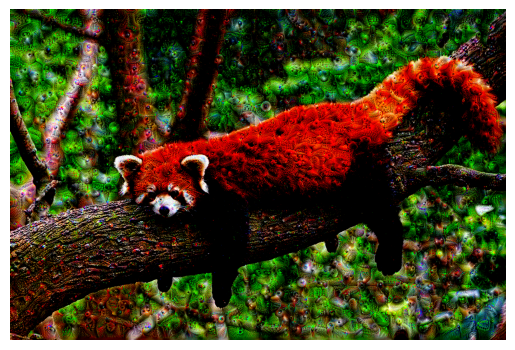

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:

# Carregue o modelo InceptionV3
model = load_inceptionv3_model()

# Carregue a imagem de entrada (substitua 'input_image.jpg' pelo seu próprio arquivo de imagem)
input_image_path = '/content/panda1200-1.jpg'
input_image = tf.keras.preprocessing.image.load_img(input_image_path)

# Aplique o Deep Dream na imagem de entrada usando a camada 'mixed3'
dream_images = deepdream(input_image, model, 'mixed3', steps=100)

# Crie um GIF animado mostrando a evolução das imagens
fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow(dream_images[0])

def update(frame):
    im.set_data(dream_images[frame])
    return im,

# Desativar o aviso temporariamente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Crie a animação
    ani = FuncAnimation(fig, update, frames=len(dream_images), repeat=False)
    ani.save('deepdream_animation.gif', writer='pillow', fps=24)

# Reative o aviso após a criação do GIF
warnings.resetwarnings()

# Exiba a imagem resultante final
plt.imshow(dream_images[-1])
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
